# Final Project

**==========================================================================================================**

## Project Description / Business Task

○	Answer all the questions in this document

○	When complete, download this as a PDF document for submission in the peer review assignment. 


You are being provided with data about sales at a store. You can access this data by clicking here [ADD LINK] and clicking on Use Template in the upper right corner. 

This data has issues that need to be fixed before it can be used for your data analysis project. some issues may include:

●	Duplicate records

●	Missing values

●	Obviously wrong values


**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import sqlite3


import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Feature-Engine library
import feature_engine

from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, DropMissingData, MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer, RandomSampleImputer

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("transactions-pet_store-small.csv", parse_dates=["Date"])

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,NaN,RKAPY3I1TP,39.55,NaN,2,NaN,NaN
1,2020-03-08,TAI-6046-9953-7908,NaN,NaN,O5FYJLBE0H,24.53,NaN,2,NaN,NaN
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,NaN,I2GQUNYDXW,36.30,medium,2,NaN,dog
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,NaN,W86BRJ9SSG,39.32,NaN,3,NaN,cat
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,NaN,CG3531YP08,38.17,NaN,2,NaN,dog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              300 non-null    datetime64[ns]
 1   Order_Number      300 non-null    object        
 2   Customer_ID       288 non-null    object        
 3   Product_Name      271 non-null    object        
 4   SKU               300 non-null    object        
 5   Price             300 non-null    float64       
 6   Size              71 non-null     object        
 7   Quantity          300 non-null    int64         
 8   Product_Category  155 non-null    object        
 9   Product_Line      298 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 23.6+ KB


In [5]:
df.dtypes.value_counts()

object            7
datetime64[ns]    1
float64           1
int64             1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
count,300,300,288,271,300,300.00,71,300.00,155,298
unique,224,267,223,21,23,NaN,3,NaN,4,2
top,2019-10-18 00:00:00,TP9-3575-6701-1829,543a9164-7b05-4195-af5d-b5741f0efe91,Reddy Beddy,28LQOI0LSK,NaN,small,NaN,treat,cat
freq,3,3,5,33,19,NaN,30,NaN,47,163
first,2019-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,26.03,NaN,2.10,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,8.94,NaN,0.79,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,10.80,NaN,1.00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,18.53,NaN,1.00,NaN,NaN


In [7]:
df.isnull().sum()

Date                  0
Order_Number          0
Customer_ID          12
Product_Name         29
SKU                   0
Price                 0
Size                229
Quantity              0
Product_Category    145
Product_Line          2
dtype: int64

In [8]:
df.duplicated().sum()

0

## Split into categorical and numeric dataframes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              300 non-null    datetime64[ns]
 1   Order_Number      300 non-null    object        
 2   Customer_ID       288 non-null    object        
 3   Product_Name      271 non-null    object        
 4   SKU               300 non-null    object        
 5   Price             300 non-null    float64       
 6   Size              71 non-null     object        
 7   Quantity          300 non-null    int64         
 8   Product_Category  155 non-null    object        
 9   Product_Line      298 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 23.6+ KB


In [10]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,NaN,RKAPY3I1TP,39.55,NaN,2,NaN,NaN
1,2020-03-08,TAI-6046-9953-7908,NaN,NaN,O5FYJLBE0H,24.53,NaN,2,NaN,NaN
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,NaN,I2GQUNYDXW,36.30,medium,2,NaN,dog
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,NaN,W86BRJ9SSG,39.32,NaN,3,NaN,cat
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,NaN,CG3531YP08,38.17,NaN,2,NaN,dog


In [11]:
df.columns

Index(['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Price', 'Size', 'Quantity', 'Product_Category', 'Product_Line'], dtype='object')

In [12]:
df_num = df[['Price', 'Quantity']]

In [13]:
df_num

,Price,Quantity
0,39.55,2
1,24.53,2
2,36.30,2
3,39.32,3
4,38.17,2
...,...,...
295,34.38,1
296,14.53,2
297,26.95,2
298,24.53,1


In [14]:
pd.pivot_table(data=df, index="Quantity", values = "Price" , aggfunc=["mean","median","std"])

,mean,median,std
,Price,Price,Price
Quantity,,,
1,25.75,26.21,8.35
2,26.63,25.48,9.23
3,25.65,24.53,9.11


In [15]:
df_cat = df[['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Size', 'Product_Category', 'Product_Line']]

In [16]:
df_cat

,Date,Order_Number,Customer_ID,Product_Name,SKU,Size,Product_Category,Product_Line
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,NaN,RKAPY3I1TP,NaN,NaN,NaN
1,2020-03-08,TAI-6046-9953-7908,NaN,NaN,O5FYJLBE0H,NaN,NaN,NaN
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,NaN,I2GQUNYDXW,medium,NaN,dog
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,NaN,W86BRJ9SSG,NaN,NaN,cat
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,NaN,CG3531YP08,NaN,NaN,dog
...,...,...,...,...,...,...,...,...
295,2019-12-10,NBO-9145-6890-2675,77b13a1f-3598-44db-a49f-0453e3a8f1ce,Snoozer Hammock,V4B4RNS3ZP,NaN,bedding,cat
296,2020-04-02,D3D-2667-7601-4187,e4bc9971-54a9-4fdb-97e5-6c5ad9d87994,Tuna Tasties,A8SU9C4GLF,NaN,treat,cat
297,2019-07-22,MFB-1481-9396-0747,9cf29d34-6977-4b8f-a90c-ab917e848e53,Scratchy Post,MPH6SCD7UT,NaN,toy,cat
298,2019-05-11,6V6-5054-5972-6803,149fe459-28f2-41e3-84a9-efc695cfcef9,Purr Mix,O5FYJLBE0H,NaN,food,cat


In [17]:
df_cat["Date"].unique()

array(['2019-03-31T00:00:00.000000000', '2020-03-08T00:00:00.000000000',
       '2021-03-13T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-05-21T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2021-07-14T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
       '2020-07-03T00:00:00.000000000', '2019-10-13T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2019-03-21T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2020-06-04T00:00:00.000000000', '2019-03-26T00:00:00.000000000',
       '2021-06-08T00:00:00.000000000', '2019-12-20T00:00:00.000000000',
       '2020-07-21T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-03-29T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-10-14T00:00:00.000000000', '2019-04-24

In [18]:
df_cat["Order_Number"].unique()

array(['5ZR-4930-9569-1000', 'TAI-6046-9953-7908', 'KZM-2608-1918-3044',
       'VXJ-7724-4518-8390', '5GV-6876-7635-4506', 'VKU-1242-8480-2800',
       'HSM-0112-0527-6783', 'DJR-9604-1142-1668', '3RH-2068-8836-6576',
       'WO7-0758-9583-2546', 'TP9-3575-6701-1829', 'EKY-4300-1138-1935',
       'WKI-0657-9471-4056', 'HJ7-2172-3544-8150', 'T8D-8382-7701-8222',
       'I0B-5452-3895-8362', '17W-0107-3788-4067', 'W23-9550-1483-6671',
       'OQV-1293-3226-9700', 'UE4-0371-6880-7040', 'QHK-9694-8868-8331',
       'VYT-4356-8978-3583', 'CHL-9582-5246-4650', 'YB9-8467-3853-4810',
       'JMQ-7190-2802-6576', 'FEH-4504-4762-6886', 'QXJ-3013-1038-0974',
       '55Z-0643-3452-0578', '2OI-1191-6735-8296', 'IN7-4576-5737-8793',
       'ITM-3893-3973-9209', 'TF3-7284-4263-6585', 'BLC-6715-6652-8279',
       'MAS-0296-0725-6519', '1NH-9182-3837-7124', 'E91-6654-6616-1870',
       '540-0891-1265-0117', 'HMP-2151-3946-4248', 'NYT-3306-3083-9776',
       '2VI-3304-1801-5314', '79G-0648-0529-7541', 

In [19]:
df_cat["Customer_ID"].unique()

array(['e2b695c8-bf79-46d5-9455-f53f68562af2', nan,
       '4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977',
       '6cb2df70-b4e9-41c6-8b90-a375376c55dd',
       '9d92f453-84ec-4beb-acc1-2b9d1cce8910',
       '041686b3-ef2e-4ae9-a349-985bd6dafed3',
       '0de82c77-495f-4840-8ef9-3e37fa30a284',
       '3a21abc5-362e-47f4-8951-362a9e322c98',
       '6909526c-22bc-4feb-9bac-d381236876ff',
       '39c18313-0232-4ab7-8d31-c9a812d43228',
       'e1528ae4-7f0d-4e72-9bb0-5656b7c3d9c5',
       '50c82438-fe35-4d35-ad7f-fa8316d1ed40',
       '2ea7342e-d217-4b12-ada2-4aff013f0d1a',
       'f6c07eac-fcae-4b09-97c9-6a01ae38825b',
       'ae1366f5-96ec-4487-a135-31e85fe63195',
       'd63ce3da-22dd-46b6-b3e2-5281cdf6c0f2',
       'c89289f5-c3cc-409c-ac21-a8f6ad8b1ae2',
       '886b676e-6a20-4bef-9f32-98d811b20131',
       '78acee25-f12f-40b5-b0eb-d4833897c751',
       '720d27de-956f-4571-bf06-f4bed6e1732b',
       'd1f9a3f9-c229-4fa0-a17c-4ddfbf56548e',
       '9cf29d34-6977-4b8f-a90c-ab917e848e53',
       '

In [20]:
df_cat["Product_Name"].unique()

array([nan, 'Snack-em Fish', 'Cat Cave', 'All Veggie Yummies',
       'Chewie Dental', 'Scratchy Post', 'Reddy Beddy', 'Tuna Tasties',
       'Whole Chemistry Recipe', 'Foozy Mouse', 'Purrfect Puree',
       'Chomp-a Plush', 'New Dish', 'Tug-a-Back', 'Ball and String',
       'Snoozer Hammock', 'Purr Mix', 'Fetch Blaster',
       'Snoozer Essentails', 'Kitty Climber', 'Feline Fix Mix',
       'Yum Fish-Dish'], dtype=object)

In [21]:
df_cat["SKU"].unique()

array(['RKAPY3I1TP', 'O5FYJLBE0H', 'I2GQUNYDXW', 'W86BRJ9SSG',
       'CG3531YP08', '058G0P7V60', 'IZBHF5KR79', 'GZCJZ3ET04',
       'ORGRBTIKZR', 'NYW2F6CPBY', 'MPH6SCD7UT', '28LQOI0LSK',
       'KDTMPSBZKZ', 'M291KHJ4LW', '8PYSMLYINS', 'V4B4RNS3ZP',
       'OWFPW3WZHG', 'A8SU9C4GLF', '6K4AUUS730', '3HDX5H4WTM',
       '1W0N5O3XOD', 'DJWE1V9LZK', 'GABWVMEL2R'], dtype=object)

In [22]:
df_cat["Size"].unique()

array([nan, 'medium', 'large', 'small'], dtype=object)

In [23]:
df_cat["Product_Category"].unique()

array([nan, 'food', 'treat', 'toy', 'bedding'], dtype=object)

In [24]:
df_cat["Product_Line"].unique()

array([nan, 'dog', 'cat'], dtype=object)

# Scrubbing Data 

In [25]:
list(df.select_dtypes(["int", "float"]))

['Price', 'Quantity']

In [26]:
list(df.select_dtypes(["bool","object"]))

['Order_Number',
 'Customer_ID',
 'Product_Name',
 'SKU',
 'Size',
 'Product_Category',
 'Product_Line']

In [27]:
df.columns

Index(['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Price', 'Size', 'Quantity', 'Product_Category', 'Product_Line'], dtype='object')

In [28]:
# we call the imputer from feature engine.
# By default it performs imputation with a string missing.

imputer = CategoricalImputer(imputation_method='missing', variables=['Customer_ID'])

In [29]:
# we fit the imputer

imputer.fit(df)

CategoricalImputer(variables=['Customer_ID'])

In [30]:
# we see that the imputer found the categorical variables

imputer.variables_

['Customer_ID']

In [31]:
# feature-engine returns a dataframe

df2 = imputer.transform(df)

In [32]:
df2.isnull().sum()

Date                  0
Order_Number          0
Customer_ID           0
Product_Name         29
SKU                   0
Price                 0
Size                229
Quantity              0
Product_Category    145
Product_Line          2
dtype: int64

In [33]:
df2["Product_Name"].value_counts()

Reddy Beddy               33
Snack-em Fish             18
Whole Chemistry Recipe    18
Purrfect Puree            18
Feline Fix Mix            15
Purr Mix                  14
New Dish                  14
Snoozer Hammock           14
Kitty Climber             13
Scratchy Post             12
Cat Cave                  12
Snoozer Essentails        12
Fetch Blaster             11
All Veggie Yummies        10
Foozy Mouse               10
Chomp-a Plush              9
Ball and String            8
Tug-a-Back                 8
Tuna Tasties               8
Yum Fish-Dish              8
Chewie Dental              6
Name: Product_Name, dtype: int64

In [34]:
df2["Size"].value_counts()

small     30
large     22
medium    19
Name: Size, dtype: int64

In [35]:
df2["Product_Category"].value_counts()

treat      47
bedding    41
toy        38
food       29
Name: Product_Category, dtype: int64

In [36]:
df2["Product_Line"].value_counts()

cat    163
dog    135
Name: Product_Line, dtype: int64

In [37]:
# We specify how we want to impute
# the categorical variables.

imputer = CategoricalImputer(imputation_method="frequent", variables=["Product_Name","Size","Product_Category",
                                                                     "Product_Line"])

In [38]:
# we fit the imputer

imputer.fit(df2)

CategoricalImputer(imputation_method='frequent',
                   variables=['Product_Name', 'Size', 'Product_Category',
                              'Product_Line'])

In [39]:
imputer.variables_

['Product_Name', 'Size', 'Product_Category', 'Product_Line']

In [40]:
df3 = imputer.transform(df2)

In [41]:
df3.isnull().sum()

Date                0
Order_Number        0
Customer_ID         0
Product_Name        0
SKU                 0
Price               0
Size                0
Quantity            0
Product_Category    0
Product_Line        0
dtype: int64

In [42]:
df3.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,Reddy Beddy,RKAPY3I1TP,39.55,small,2,treat,cat
1,2020-03-08,TAI-6046-9953-7908,Missing,Reddy Beddy,O5FYJLBE0H,24.53,small,2,treat,cat
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,Reddy Beddy,I2GQUNYDXW,36.30,medium,2,treat,dog
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,Reddy Beddy,W86BRJ9SSG,39.32,small,3,treat,cat
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,Reddy Beddy,CG3531YP08,38.17,small,2,treat,dog


In [43]:
#df3.to_csv("petstore.csv", index=False)

**==========================================================================================================**

# Explore

**==========================================================================================================**

In [44]:
df = pd.read_csv("petstore.csv", parse_dates=["Date"])

In [45]:
df

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,2019-03-31,5ZR-4930-9569-1000,e2b695c8-bf79-46d5-9455-f53f68562af2,Reddy Beddy,RKAPY3I1TP,39.55,small,2,treat,cat
1,2020-03-08,TAI-6046-9953-7908,Missing,Reddy Beddy,O5FYJLBE0H,24.53,small,2,treat,cat
2,2021-03-13,KZM-2608-1918-3044,4c3aa8dc-fc7b-4796-9c70-b0aa9a4f1977,Reddy Beddy,I2GQUNYDXW,36.30,medium,2,treat,dog
3,2019-06-30,VXJ-7724-4518-8390,6cb2df70-b4e9-41c6-8b90-a375376c55dd,Reddy Beddy,W86BRJ9SSG,39.32,small,3,treat,cat
4,2019-05-21,5GV-6876-7635-4506,9d92f453-84ec-4beb-acc1-2b9d1cce8910,Reddy Beddy,CG3531YP08,38.17,small,2,treat,dog
...,...,...,...,...,...,...,...,...,...,...
295,2019-12-10,NBO-9145-6890-2675,77b13a1f-3598-44db-a49f-0453e3a8f1ce,Snoozer Hammock,V4B4RNS3ZP,34.38,small,1,bedding,cat
296,2020-04-02,D3D-2667-7601-4187,e4bc9971-54a9-4fdb-97e5-6c5ad9d87994,Tuna Tasties,A8SU9C4GLF,14.53,small,2,treat,cat
297,2019-07-22,MFB-1481-9396-0747,9cf29d34-6977-4b8f-a90c-ab917e848e53,Scratchy Post,MPH6SCD7UT,26.95,small,2,toy,cat
298,2019-05-11,6V6-5054-5972-6803,149fe459-28f2-41e3-84a9-efc695cfcef9,Purr Mix,O5FYJLBE0H,24.53,small,1,food,cat


In [46]:
df.columns

Index(['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Price', 'Size', 'Quantity', 'Product_Category', 'Product_Line'], dtype='object')

In [47]:
df.describe()

,Price,Quantity
count,300.00,300.00
mean,26.03,2.10
std,8.94,0.79
min,10.80,1.00
25%,18.53,1.00
50%,25.48,2.00
75%,34.38,3.00
max,39.55,3.00


In [48]:
df.groupby(["Date"], as_index=False).mean()

,Date,Price,Quantity
0,2019-03-17,25.48,2.00
1,2019-03-18,39.24,3.00
2,2019-03-21,27.09,2.00
3,2019-03-26,26.95,2.00
4,2019-03-29,26.01,1.50
...,...,...,...
219,2021-07-30,16.71,3.00
220,2021-08-05,21.82,1.00
221,2021-08-10,17.16,2.00
222,2021-08-24,10.80,2.00


In [49]:
df.groupby(['Product_Name'], as_index=False)["Quantity"].median()

,Product_Name,Quantity
0,All Veggie Yummies,2.00
1,Ball and String,3.00
2,Cat Cave,2.00
3,Chewie Dental,2.00
4,Chomp-a Plush,2.00
5,Feline Fix Mix,2.00
6,Fetch Blaster,2.00
7,Foozy Mouse,2.00
8,Kitty Climber,2.00
9,New Dish,2.50


In [50]:
df.groupby(['Product_Name'], as_index=False)["Price"].mean()

,Product_Name,Price
0,All Veggie Yummies,25.48
1,Ball and String,16.71
2,Cat Cave,29.66
3,Chewie Dental,38.17
4,Chomp-a Plush,39.24
5,Feline Fix Mix,39.55
6,Fetch Blaster,29.47
7,Foozy Mouse,10.80
8,Kitty Climber,39.32
9,New Dish,17.16


In [51]:
df.groupby(['Size'], as_index=False)["Price"].mean()

,Size,Price
0,large,19.04
1,medium,36.30
2,small,25.87


In [52]:
df.groupby(["Product_Category"])["Price", "Quantity"].mean()

,Price,Quantity
Product_Category,,
bedding,27.98,2.00
food,22.73,2.21
toy,27.77,2.00
treat,25.77,2.13


In [53]:
df.groupby(["Product_Line"])["Price", "Quantity"].mean()

,Price,Quantity
Product_Line,,
cat,25.95,2.12
dog,26.13,2.09


In [54]:
df[["Price", "Quantity"]].corr()

,Price,Quantity
Price,1.00,-0.01
Quantity,-0.01,1.00


### SQL Commands

In [55]:
db = sqlite3.connect("petstore.csv") #Create connection

In [56]:
db

In [57]:
cursor = db.cursor()

In [58]:
cursor

In [59]:
#pd.read_sql_query("SELECT Price from petstore", db)

In [60]:
# pd.read_sql_query("SELECT Product_Line \
#                    FROM petstore \
#                    WHERE Price > 30  \
#                    LIMIT 10;", db)

In [61]:
# pd.read_sql_query("SELECT Size \
#                     FROM petstore \
#                     WHERE Price < 15  \
#                     LIMIT 10;", db)

In [62]:
# pd.read_sql_query("SELECT Product_Name \
#                      FROM petstore \
#                      ORDER BY AVG(Price);", db)

**==========================================================================================================**

# Visualize

In [63]:
df2 = df.groupby(['Product_Name'], as_index=False)["Price"].mean()
df2

,Product_Name,Price
0,All Veggie Yummies,25.48
1,Ball and String,16.71
2,Cat Cave,29.66
3,Chewie Dental,38.17
4,Chomp-a Plush,39.24
5,Feline Fix Mix,39.55
6,Fetch Blaster,29.47
7,Foozy Mouse,10.80
8,Kitty Climber,39.32
9,New Dish,17.16


In [64]:
df2 = df2.sort_values(by="Price", ascending=False).head()
df2

,Product_Name,Price
5,Feline Fix Mix,39.55
8,Kitty Climber,39.32
4,Chomp-a Plush,39.24
3,Chewie Dental,38.17
16,Snoozer Hammock,34.38


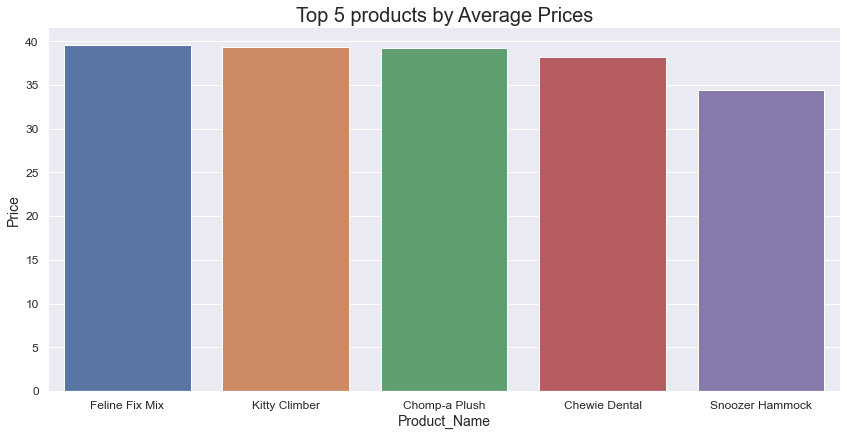

In [65]:
sns.catplot(x="Product_Name", y="Price", kind='bar', data=df2, aspect=2, height=6)
plt.title("Top 5 products by Average Prices", size=20)
plt.show()

**==========================================================================================================**

## Histogram

### Pandas Version

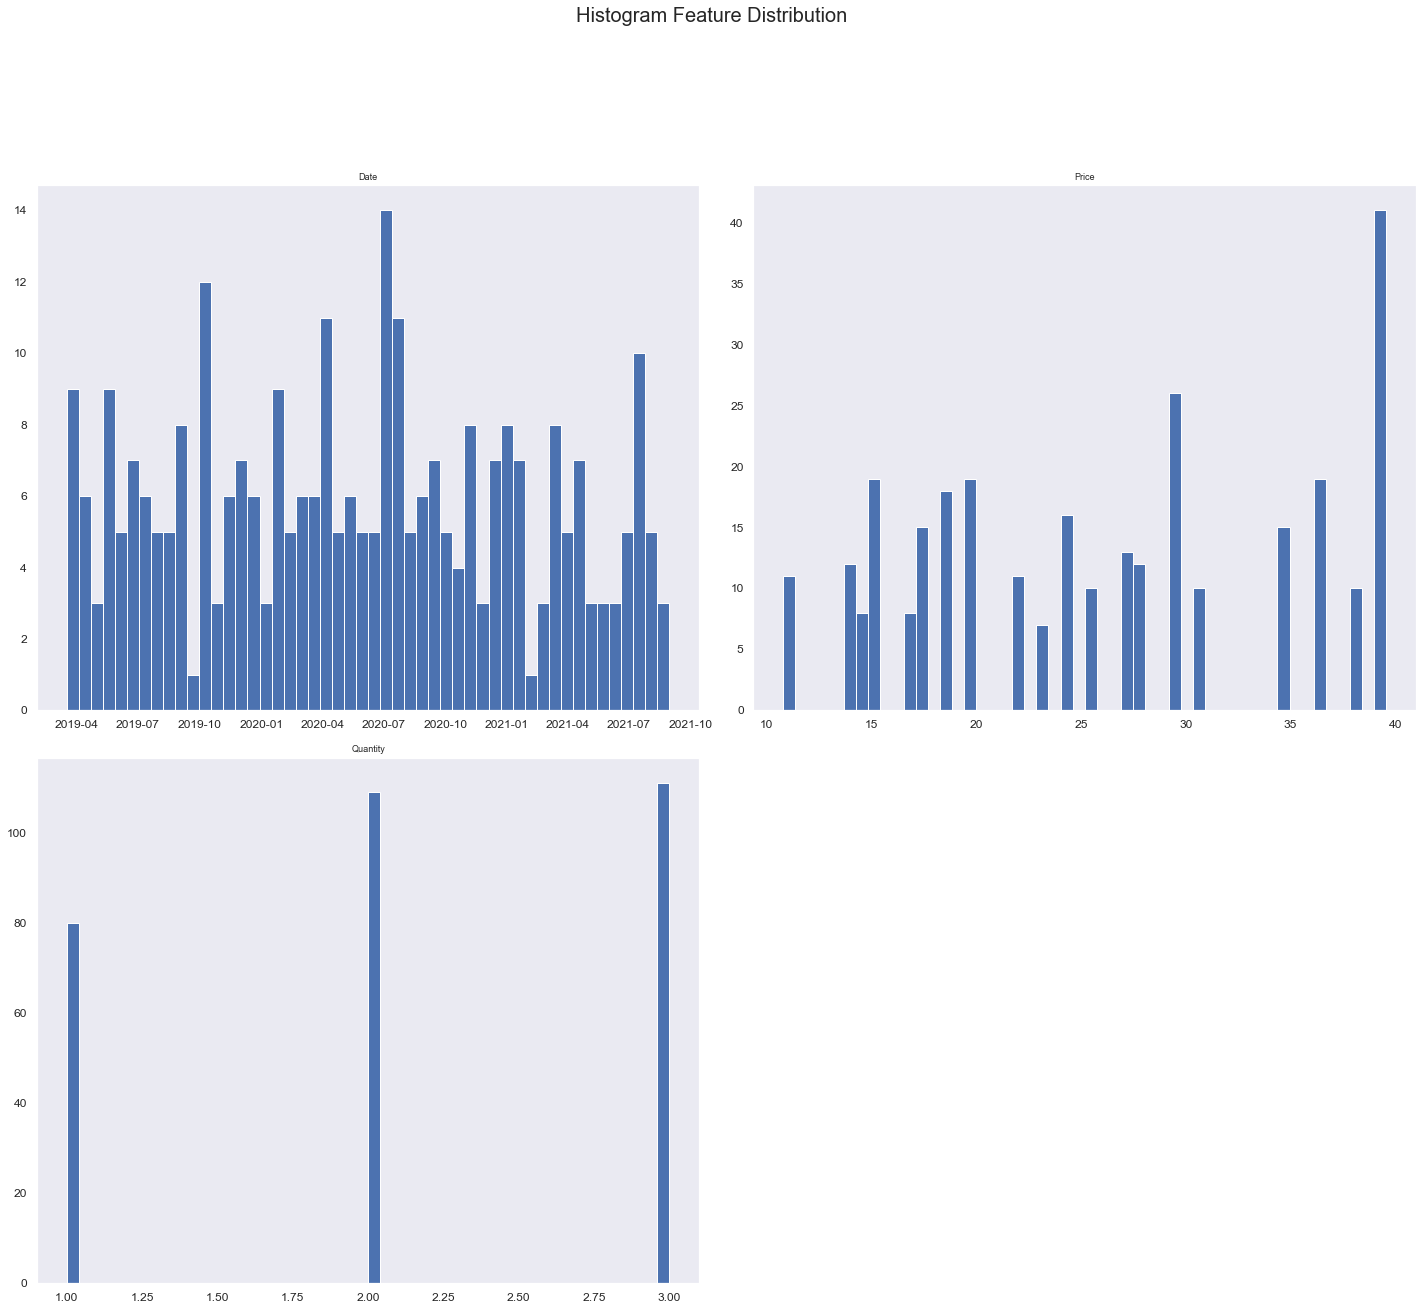

In [66]:
df.hist(bins=50, figsize=(20,80), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

**==========================================================================================================**

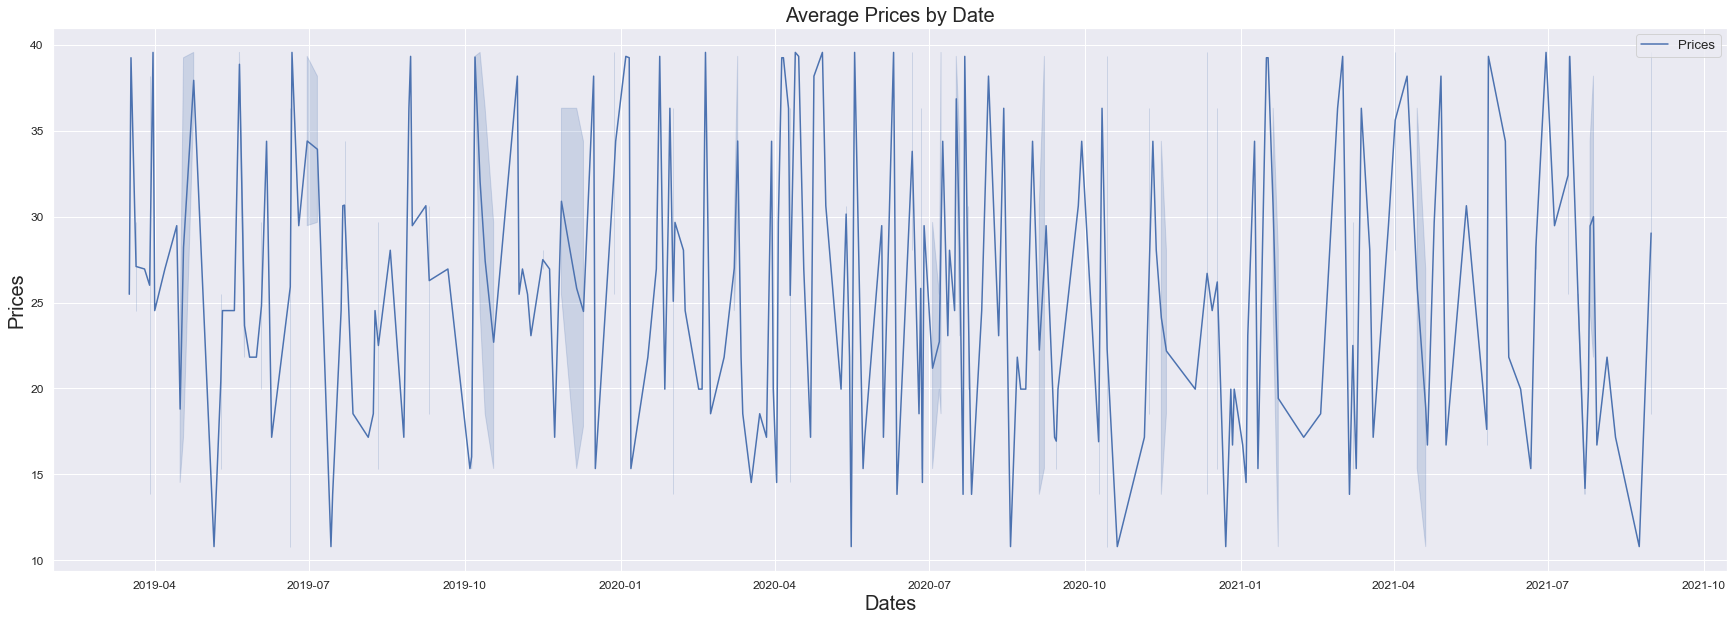

In [67]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.Date, y=df.Price, data=df, estimator='mean')
plt.title("Average Prices by Date", fontsize=20)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Prices", fontsize=20)
plt.legend(["Prices"])
plt.show()

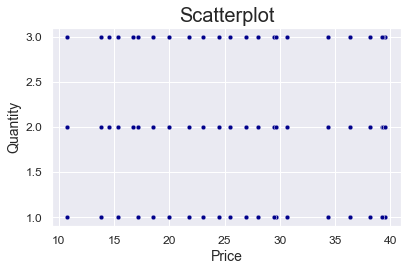

In [68]:
sns.scatterplot(x="Price", y="Quantity", data=df, color='darkblue', s=20)
plt.title("Scatterplot", size = 20)

plt.tight_layout()
plt.show()

**==========================================================================================================**

### Seaborn Version

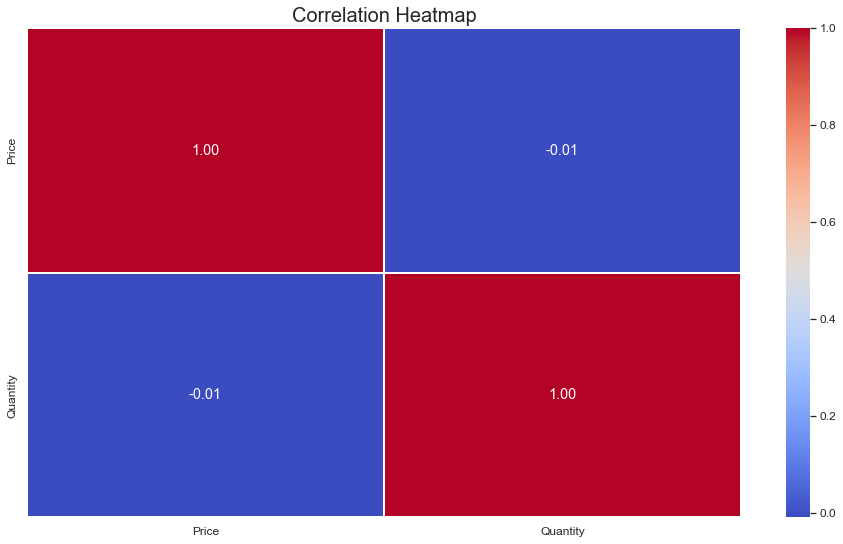

In [69]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

**==========================================================================================================**

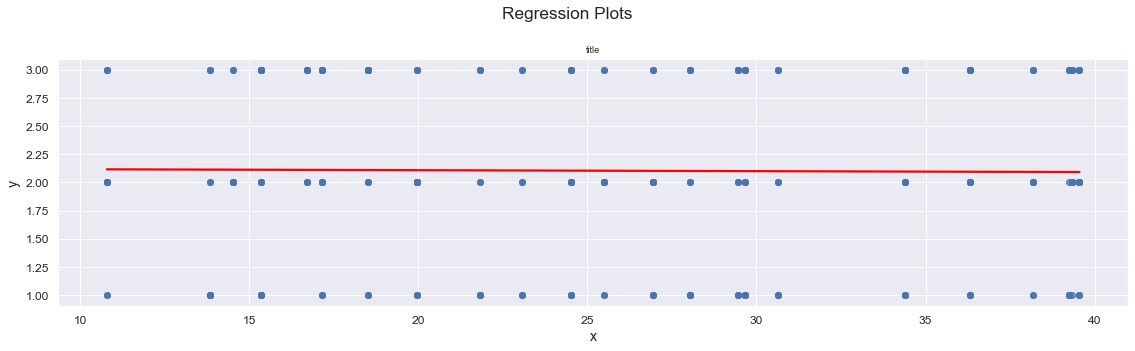

In [70]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.Price, y=df.Quantity, data=df, ci=None, line_kws=line_color)
plt.title('title')
plt.xlabel("x")
plt.ylabel("y")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam